In [1]:
import pandas as pd

# Sample data
data = {
    'ApplicantIncome': [5000, 3000, 4000, 6000, 3500, 4500, 7000, 2000, 2500, 3200],
    'CoapplicantIncome': [0, 1500, 0, 0, 1800, 0, 0, 0, 1200, 0],
    'LoanAmount': [200, 100, 150, 250, 120, 180, 300, 80, 90, 110],
    'Loan_Amount_Term': [360, 360, 360, 360, 360, 360, 360, 360, 360, 360],
    'Credit_History': [1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'Married': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No'],
    'Education': ['Graduate', 'Not Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate', 'Graduate'],
    'Self_Employed': ['No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No'],
    'Property_Area': ['Urban', 'Rural', 'Urban', 'Semiurban', 'Rural', 'Urban', 'Urban', 'Rural', 'Semiurban', 'Urban'],
    'Loan_Status': ['Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y']
}

df = pd.DataFrame(data)
df.to_csv('loan.csv', index=False)
print("loan.csv file created successfully.")


loan.csv file created successfully.


In [2]:
# Load data
df = pd.read_csv('loan.csv')

# Display first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Distribution of target variable
print(df['Loan_Status'].value_counts())


   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5000                  0         200               360   
1             3000               1500         100               360   
2             4000                  0         150               360   
3             6000                  0         250               360   
4             3500               1800         120               360   

   Credit_History  Gender Married     Education Self_Employed Property_Area  \
0               1    Male     Yes      Graduate            No         Urban   
1               0  Female      No  Not Graduate           Yes         Rural   
2               1    Male     Yes      Graduate            No         Urban   
3               1    Male     Yes      Graduate            No     Semiurban   
4               0  Female      No  Not Graduate           Yes         Rural   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           N  
  

In [3]:
# For this sample, no missing values, but if there were:
# df.fillna(method='ffill', inplace=True)

# Encode categorical variables using one-hot encoding or label encoding
from sklearn.preprocessing import LabelEncoder

# Encode target variable
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Encode binary categorical variables
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encode 'Property_Area'
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

print(df.head())


   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5000                  0         200               360   
1             3000               1500         100               360   
2             4000                  0         150               360   
3             6000                  0         250               360   
4             3500               1800         120               360   

   Credit_History  Gender  Married  Education  Self_Employed  Loan_Status  \
0               1       1        1          0              0            1   
1               0       0        0          1              1            0   
2               1       1        1          0              0            1   
3               1       1        1          0              0            1   
4               0       0        0          1              1            0   

   Property_Area_Semiurban  Property_Area_Urban  
0                    False                 True  
1         

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



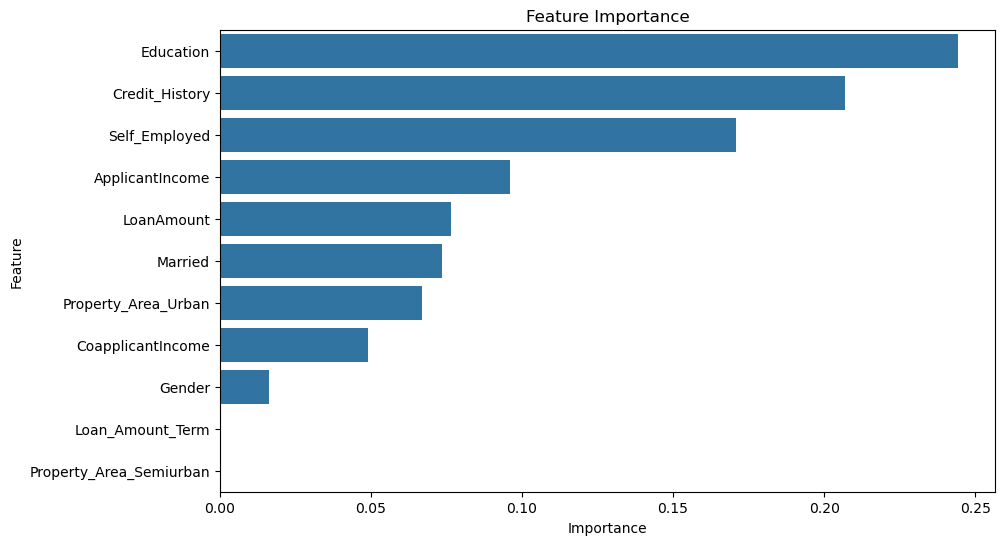

                    Feature  Importance
7                 Education    0.244303
4            Credit_History    0.206737
8             Self_Employed    0.170794
0           ApplicantIncome    0.095979
2                LoanAmount    0.076473
6                   Married    0.073651
10      Property_Area_Urban    0.066808
1         CoapplicantIncome    0.048889
5                    Gender    0.016367
3          Loan_Amount_Term    0.000000
9   Property_Area_Semiurban    0.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance')
plt.show()

print(feat_imp)
